# Machine Learning LAB 2: SUPPORT VECTOR MACHINES
Course 2022/23: P. Zanuttigh, M. Mel, F. Barbato

The notebook contains some simple tasks to be performed with **SUPPORT VECTOR MACHINES (SVM)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Weather Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for weather classification. We will use a dataset collected using the Luxottica iSee glasses, similarly to the previous laboratory.
The dataset corresponds to 8 hours of atmospherical data recordings sampled every 3 seconds.

The dataset labels are the following:

| ID | Label |
| :-: | :-: |
| 0 | Sunny |
| 1 | Rain |
| 2 | Cloudy |
| 3 | Mostly Clear|

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB2.ipynb**, failure to do so will incur in a **lower grade**.
<br>

**Student name**: Elena Zoppellari<br>
**ID Number**: 2076715

In [1]:
#load the required packages
%matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load the dataset
def load_dataset(path):
    with np.load(path) as data:
        x, y = data["x"], data["y"]
        
        # normalize data
        x -= x.mean(axis=0)
        x /= x.std(axis=0)
        
    return x, y

## A) Hyper-parameter search

**TO DO (A.0):** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: 1234567 + 1

In [3]:
# fix your ID ("numero di matricola") and the seed for random generator
# as usual you can try different seeds by adding a constant to the number:
# ID = 1234567 + X
ID = 2076715
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset and split it** in training and test set (while the **training** set is **typically larger**, here we set the number of training samples to 1000 and 4000 for the test data).
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
X, y = load_dataset("data/lux.npz")
print(X.shape, y.shape)

(15099, 3) (15099,)


In [5]:
# The task is quite easy, let's add noise to make it more challenging!
# You can try without noise (comment the next 2 lines, easy task), with the suggested amount of noise,
# or play with the suggested amount of noise 

noise = np.random.normal(0,0.1,X.shape)
X=X+noise

**TO DO (A.1):** **Divide** the **data into training and test set** (for this part use 1000 samples in the **first** set, 4000 in the **second** one). Make sure that each label is present at least 10 times in training. If it is not, then keep adding permutations to the initial data until this happens. <br>


In [6]:
#random permute the data and split into training and test taking the first 1000
#data samples as training and 4000 samples as test
permutation = list(np.random.permutation(X.shape[0]))

X = X[permutation]
y = y[permutation]

m_training = 1000
m_test = 4000

X_train = X[:m_training,]
X_test = X[m_training:(m_test+m_training),]
y_train = y[:m_training,]
y_test = y[m_training:(m_test+m_training),]

print("X_train shape:", X_train.shape,"X_test shape:", X_test.shape,"||","y_train shape:",  y_train.shape,"y_test shape:", y_test.shape)

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

X_train shape: (1000, 3) X_test shape: (4000, 3) || y_train shape: (1000,) y_test shape: (4000,)
Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [423 170 347  60]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    cmap = plt.cm.get_cmap('Accent', 4)
    im = ax.scatter(X_matrix[:,0], X_matrix[:,1], X_matrix[:,2], c=labels, cmap=cmap)
    im.set_clim(-0.5, 3.5)
    cbar=fig.colorbar(im, ticks=[0,1,2,3], orientation='vertical', cmap=cmap)
    cbar.ax.set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear']) 
    

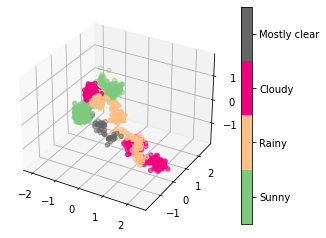

In [8]:
#let's try the plotting function
plot_input(X_train,y_train)

**TO DO (A.2):** Use a SVM classfier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel.

In [9]:
import pandas as pd

#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [ 0.01, 0.1, 1, 10]}

#train linear SVM
grid1 = GridSearchCV(SVC(kernel = "linear"), param_grid = parameters, verbose=1, cv=4, return_train_score = True)
grid1.fit(X_train,y_train)

print ('\nRESULTS FOR LINEAR KERNEL')

print("\nBest parameters set found:")
print(grid1.best_params_)

print("\nScore with best parameters:")
print(grid1.best_score_)

print("\nAll scores on the grid:")
data = pd.DataFrame.from_dict(grid1.cv_results_)
data = data.set_index(["param_C"])
data.drop(data.columns[[0,1,2,3,4]], axis = 1, inplace = True)
display(data)

Fitting 4 folds for each of 4 candidates, totalling 16 fits

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 10}

Score with best parameters:
0.896

All scores on the grid:


,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
param_C,,,,,,,,,,,,,
0.01,0.760,0.760,0.760,0.756,0.759,0.001732,4,0.758667,0.758667,0.764000,0.760000,0.760333,0.002186
0.10,0.888,0.892,0.884,0.840,0.876,0.020976,3,0.872000,0.869333,0.870667,0.894667,0.876667,0.010435
1.00,0.900,0.912,0.904,0.848,0.891,0.025199,2,0.893333,0.885333,0.889333,0.910667,0.894667,0.009661
10.00,0.904,0.920,0.908,0.852,0.896,0.026077,1,0.896000,0.890667,0.897333,0.914667,0.899667,0.009012


**TO DO (A.3):** Pick a model for the Polynomial kernel with degree=2.

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
grid2 = GridSearchCV(SVC(kernel="poly", degree = 2),param_grid = parameters, verbose=1, cv=4, return_train_score = True)
grid2.fit(X_train,y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL')

print("\nBest parameters set found:")
print(grid2.best_params_)

print("\nScore with best parameters:")
print(grid2.best_score_)

print("\nAll scores on the grid:")
data = pd.DataFrame.from_dict(grid2.cv_results_)
data = data.set_index(["param_C","param_gamma"])
data.drop(data.columns[[0,1,2,3,4]], axis = 1, inplace = True)
display(data)

Fitting 4 folds for each of 9 candidates, totalling 36 fits

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 1.0}

Score with best parameters:
0.9339999999999999

All scores on the grid:


split0_test_score  split1_test_score  split2_test_score  \
param_C param_gamma                                                            
0.01    0.01                     0.424              0.424              0.420   
        0.10                     0.424              0.424              0.420   
        1.00                     0.848              0.856              0.844   
0.10    0.01                     0.424              0.424              0.420   
        0.10                     0.760              0.772              0.756   
        1.00                     0.920              0.940              0.924   
1.00    0.01                     0.424              0.424              0.420   
        0.10                     0.848              0.856              0.844   
        1.00                     0.936              0.940              0.944   

                     split3_test_score  mean_test_score  std_test_score  \
param_C param_gamma                                                       
0.01    0.01                     0.424            0.423        0.001732   
        0.10                     0.424            0.423        0.001732   
        1.00                     0.800            0.837        0.021794   
0.10    0.01                     0.424            0.423        0.001732   
        0.10                     0.768            0.764        0.006325   
        1.00                     0.884            0.917        0.020469   
1.00    0.01                     0.424            0.423        0.001732   
        0.10                     0.800            0.837        0.021794   
        1.00                     0.916            0.934        0.010770   

                     rank_test_score  split0_train_score  split1_train_score  \
param_C param_gamma                                                            
0.01    0.01                       6            0.422667            0.422667   
        0.10                       6            0.422667            0.422667   
        1.00                       3            0.840000            0.837333   
0.10    0.01                       6            0.422667            0.422667   
        0.10                       5            0.760000            0.768000   
        1.00                       2            0.922667            0.924000   
1.00    0.01                       6            0.422667            0.422667   
        0.10                       3            0.840000            0.837333   
        1.00                       1            0.937333            0.932000   

                     split2_train_score  split3_train_score  mean_train_score  \
param_C param_gamma                                                             
0.01    0.01                   0.424000            0.422667          0.423000   
        0.10                   0.424000            0.422667          0.423000   
        1.00                   0.830667            0.848000          0.839000   
0.10    0.01                   0.424000            0.422667          0.423000   
        0.10                   0.766667            0.770667          0.766333   
        1.00                   0.920000            0.921333          0.922000   
1.00    0.01                   0.424000            0.422667          0.423000   
        0.10                   0.830667            0.848000          0.839000   
        1.00                   0.937333            0.938667          0.936333   

                     std_train_score  
param_C param_gamma                   
0.01    0.01                0.000577  
        0.10                0.000577  
        1.00                0.006209  
0.10    0.01                0.000577  
        0.10                0.003930  
        1.00                0.001491  
1.00    0.01                0.000577  
        0.10                0.006209  
        1.00                0.002560

**TO DO (A.4):** Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1, 1]}

#run SVM with poly of higher degree kernel
degree = 3

grid3 = GridSearchCV(SVC(kernel="poly", degree = degree),param_grid = parameters, verbose=1, cv=4, return_train_score = True)
grid3.fit(X_train,y_train)

print ('\nRESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("\nBest parameters set found:")
print(grid3.best_params_)

print("\nScore with best parameters:")
print(grid3.best_score_)

print("\nAll scores on the grid:")
data = pd.DataFrame.from_dict(grid3.cv_results_)
data = data.set_index(["param_C","param_gamma"])
data.drop(data.columns[[0,1,2,3,4]], axis = 1, inplace = True)
display(data)

Fitting 4 folds for each of 9 candidates, totalling 36 fits

RESULTS FOR POLY DEGREE= 3  KERNEL

Best parameters set found:
{'C': 1, 'gamma': 1}

Score with best parameters:
0.9259999999999999

All scores on the grid:


split0_test_score  split1_test_score  split2_test_score  \
param_C param_gamma                                                            
0.01    0.01                     0.424              0.424              0.420   
        0.10                     0.424              0.424              0.420   
        1.00                     0.848              0.868              0.852   
0.10    0.01                     0.424              0.424              0.420   
        0.10                     0.512              0.512              0.500   
        1.00                     0.892              0.912              0.916   
1.00    0.01                     0.424              0.424              0.420   
        0.10                     0.768              0.784              0.784   
        1.00                     0.924              0.936              0.956   

                     split3_test_score  mean_test_score  std_test_score  \
param_C param_gamma                                                       
0.01    0.01                     0.424            0.423        0.001732   
        0.10                     0.424            0.423        0.001732   
        1.00                     0.812            0.845        0.020469   
0.10    0.01                     0.424            0.423        0.001732   
        0.10                     0.524            0.512        0.008485   
        1.00                     0.860            0.895        0.022159   
1.00    0.01                     0.424            0.423        0.001732   
        0.10                     0.728            0.766        0.022891   
        1.00                     0.888            0.926        0.024739   

                     rank_test_score  split0_train_score  split1_train_score  \
param_C param_gamma                                                            
0.01    0.01                       6            0.422667            0.422667   
        0.10                       6            0.422667            0.422667   
        1.00                       3            0.849333            0.836000   
0.10    0.01                       6            0.422667            0.422667   
        0.10                       5            0.512000            0.512000   
        1.00                       2            0.893333            0.892000   
1.00    0.01                       6            0.422667            0.422667   
        0.10                       4            0.762667            0.766667   
        1.00                       1            0.930667            0.922667   

                     split2_train_score  split3_train_score  mean_train_score  \
param_C param_gamma                                                             
0.01    0.01                   0.424000            0.422667          0.423000   
        0.10                   0.424000            0.422667          0.423000   
        1.00                   0.842667            0.854667          0.845667   
0.10    0.01                   0.424000            0.422667          0.423000   
        0.10                   0.516000            0.508000          0.512000   
        1.00                   0.890667            0.912000          0.897000   
1.00    0.01                   0.424000            0.422667          0.423000   
        0.10                   0.752000            0.788000          0.767333   
        1.00                   0.920000            0.944000          0.929333   

                     std_train_score  
param_C param_gamma                   
0.01    0.01                0.000577  
        0.10                0.000577  
        1.00                0.007016  
0.10    0.01                0.000577  
        0.10                0.002828  
        1.00                0.008711  
1.00    0.01                0.000577  
        0.10                0.013081  
        1.00                0.009333

**TO DO (A.5):** Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
grid4 = GridSearchCV(SVC(kernel="rbf"),param_grid = parameters, verbose=1, cv=4, return_train_score = True)
grid4.fit(X_train,y_train)

print ('\nRESULTS FOR rbf KERNEL')

print("\nBest parameters set found:")
print(grid4.best_params_)

print("\nScore with best parameters:")
print(grid4.best_score_)

print("\nAll scores on the grid:")
data = pd.DataFrame.from_dict(grid4.cv_results_)
data = data.set_index(["param_C","param_gamma"])
data.drop(data.columns[[0,1,2,3,4]], axis = 1, inplace = True)
display(data)

Fitting 4 folds for each of 16 candidates, totalling 64 fits

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 100, 'gamma': 1}

Score with best parameters:
0.985

All scores on the grid:


split0_test_score  split1_test_score  split2_test_score  \
param_C param_gamma                                                            
0.1     0.001                    0.424              0.424              0.420   
        0.010                    0.568              0.576              0.552   
        0.100                    0.844              0.852              0.840   
        1.000                    0.932              0.964              0.948   
1.0     0.001                    0.564              0.572              0.552   
        0.010                    0.768              0.768              0.768   
        0.100                    0.924              0.948              0.952   
        1.000                    0.984              0.980              0.992   
10.0    0.001                    0.764              0.764              0.764   
        0.010                    0.900              0.900              0.888   
        0.100                    0.980              0.980              0.984   
        1.000                    0.984              0.988              0.980   
100.0   0.001                    0.896              0.892              0.888   
        0.010                    0.932              0.960              0.964   
        0.100                    0.980              0.988              0.980   
        1.000                    0.988              0.988              0.980   

                     split3_test_score  mean_test_score  std_test_score  \
param_C param_gamma                                                       
0.1     0.001                    0.424            0.423        0.001732   
        0.010                    0.596            0.573        0.015843   
        0.100                    0.800            0.834        0.020100   
        1.000                    0.900            0.936        0.023664   
1.0     0.001                    0.596            0.571        0.016093   
        0.010                    0.792            0.774        0.010392   
        0.100                    0.900            0.931        0.020857   
        1.000                    0.964            0.980        0.010198   
10.0    0.001                    0.780            0.768        0.006928   
        0.010                    0.848            0.884        0.021354   
        0.100                    0.956            0.975        0.011091   
        1.000                    0.980            0.983        0.003317   
100.0   0.001                    0.844            0.880        0.020976   
        0.010                    0.908            0.941        0.022694   
        0.100                    0.980            0.982        0.003464   
        1.000                    0.984            0.985        0.003317   

                     rank_test_score  split0_train_score  split1_train_score  \
param_C param_gamma                                                            
0.1     0.001                     16            0.422667            0.422667   
        0.010                     14            0.572000            0.572000   
        0.100                     11            0.829333            0.826667   
        1.000                      7            0.941333            0.944000   
1.0     0.001                     15            0.572000            0.569333   
        0.010                     12            0.769333            0.768000   
        0.100                      8            0.933333            0.936000   
        1.000                      4            0.977333            0.978667   
10.0    0.001                     13            0.765333            0.765333   
        0.010                      9            0.877333            0.880000   
        0.100                      5            0.977333            0.976000   
        1.000                      2            0.988000            0.985333   
100.0   0.001                     10            0.873333            0.874667   
        0.010                

**TO DO (A.Q1) [Answer the following]** <br> 
What do you observe when using RBF and polynomial kernels on this dataset ?

<div class="alert alert-block alert-info">
    **ANSWER A.Q1**:<br>
    Using RBF and polynomial kernels it can be observed that, for all the C values, the higher score is reached with the higher value of gamma avaiable ($\gamma = 1$). Indeed $\gamma \propto \frac{1}{\sigma^2}$, then the smaller values of gamma represent a very general and dispersive solution instead of one that can fit precisely the training set; $\gamma = 1$ is a value large enough to correctly fit the dataset, but not too high to provide overfitting (in the two plots at A.7 this behaviour is underlined: train accuracy increase with gamma, but test accuracy increase only until gamma reaches values around 1-10, then it decreases because of overfitting). 
    For each kernel with $\gamma = 1$, the highest scores are obtained using the larger avaiable C value, which corresponds to $C=1$ for polynomial ones and $C=100$ for Radial Basis Function one; since $C \propto \frac{1}{\lambda}$, it can be stated that polynominal kernels need more regularization than the rbf one. 
    In conclusion, the overall best model for the multiclassification task is SVC with the Radial Basis Function as kernel, $C=100$ (even if it was observed that changing the initial seed the best regularization value found was $C=10$) and $\gamma = 1$, which provide a mean accuracy on the test set of 98.5%.
    </div>

**TO DO (A.6):** Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=100, gamma=1, kernel="rbf")
best_SVM.fit(X_train,y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


Best SVM training error: 0.012000
Best SVM test error: 0.010250


**TO DO (A.7):** Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


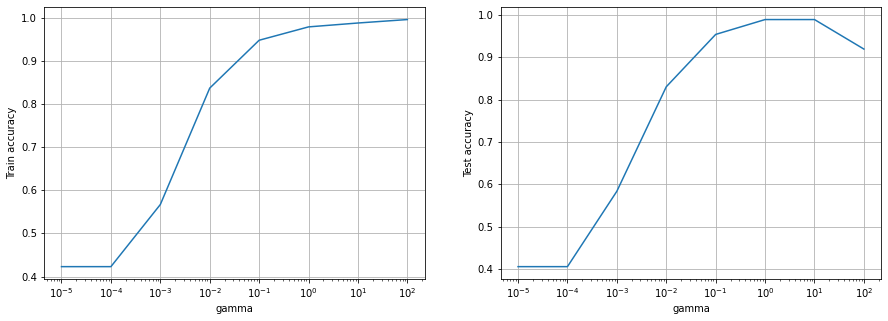

In [14]:
#Test with different values of gamma

gamma_values = np.logspace(-5,2,8)
print(gamma_values)
# use rbf kernel and C=1
train_acc_list, test_acc_list = [], []

for g in gamma_values:
    best_SVM = SVC(C=1, gamma=g, kernel="rbf")
    best_SVM.fit(X_train,y_train)
    train_acc_list.append(best_SVM.score(X_train,y_train))
    test_acc_list.append(best_SVM.score(X_test,y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## B) More data
Now let's do the same but using more data points for training.

**TO DO (B.0):** Choose a higher number of data points (e.g. x = 10000) for training data depending on your computing capability.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

# initialize support variables for boundaries visualization
granularity = 25
x_max = np.abs(X).max()
x_range = np.linspace(-x_max, x_max, granularity)
x_grid = np.stack(np.meshgrid(x_range, x_range, x_range)).reshape(3, -1).T

Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [4017 1662 3700  621]


**TO DO (B.1):** Let's try to use SVM with parameters obtained from the best model for $m_{training} =  10000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO (C.Q1) cell below.

In [16]:
#get training and test error for the best SVM model from CV

rbf_SVM = SVC(C=100, gamma=1, kernel="rbf")
rbf_SVM.fit(X_train,y_train)

# (error is 1 - svm.score)
training_error = 1 - rbf_SVM.score(X_train,y_train)
test_error = 1 - rbf_SVM.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.009800
Best SVM test error: 0.009217


**TO DO (B.2):** Just for comparison, let's also use logistic regression (without regularization, i.e. with C very large).

In [17]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(C=10**5)
lr.fit(X_train,y_train)

# (error is 1 - logreg.score)
training_error = 1 - lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.110200
Best logistic regression test error: 0.116886


**TO DO (B.3):** Try logistic regression with regularization (use C=1)

In [18]:
regL2 = linear_model.LogisticRegression(C=1)
regL2.fit(X_train,y_train)

# (error is 1 - logreg.score)
training_error = 1 - regL2.score(X_train,y_train)
test_error = 1 - regL2.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.109900
Best regularized logistic regression test error: 0.116493


# C) Boundaries Visualization

Now let us compare the shape of classification boundaries. 


**TO DO (C.0):** Use the SVM, logistic regression (with and without regularization) to predict on the test set X_test. 

In [19]:
rbf_SVM_test = rbf_SVM.predict(X_test)
lr_test = lr.predict(X_test)
regL2_test = regL2.predict(X_test)

We constructed a grid of all possible combinations of input values, we now use it to extract the classification boundaries of the three classifiers by having them predict on each input.

(-2.7043748438184267, 2.7043748438184267)

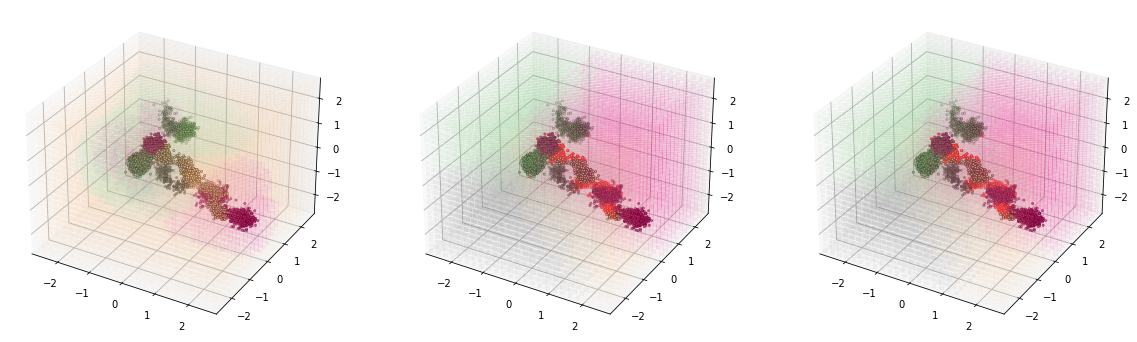

In [20]:

rbf_SVM_grid = rbf_SVM.predict(x_grid)
lr_grid = lr.predict(x_grid)
regL2_grid = regL2.predict(x_grid)


rbf_SVM_m = y_test == rbf_SVM_test
lr_m = y_test == lr_test
regL2_m = y_test == lr_test

fig = plt.figure(figsize=(20,36))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

ax1.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=rbf_SVM_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax2.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=lr_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax3.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=regL2_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')

ax1.scatter(X_test[rbf_SVM_m,0], X_test[rbf_SVM_m,1], X_test[rbf_SVM_m,2], c=y_test[rbf_SVM_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax1.scatter(X_test[~rbf_SVM_m,0], X_test[~rbf_SVM_m,1], X_test[~rbf_SVM_m,2], c=y_test[~rbf_SVM_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax1.set_xlim([-x_max, x_max])
ax1.set_ylim([-x_max, x_max])
ax1.set_zlim([-x_max, x_max])

ax2.scatter(X_test[lr_m,0], X_test[lr_m,1], X_test[lr_m,2], c=y_test[lr_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax2.scatter(X_test[~lr_m,0], X_test[~lr_m,1], X_test[~lr_m,2], c=y_test[~lr_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax2.set_xlim([-x_max, x_max])
ax2.set_ylim([-x_max, x_max])
ax2.set_zlim([-x_max, x_max])

ax3.scatter(X_test[regL2_m,0], X_test[regL2_m,1], X_test[regL2_m,2], c=y_test[regL2_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax3.scatter(X_test[~regL2_m,0], X_test[~regL2_m,1], X_test[~regL2_m,2], c=y_test[~regL2_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax3.set_xlim([-x_max, x_max])
ax3.set_ylim([-x_max, x_max])
ax3.set_zlim([-x_max, x_max])

**TO DO (C.Q1) [Answer the following]** <br> 
Compare and discuss:
- the results from SVM with m=600 and with m=10000 (or whatever value you set) training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

<div class="alert alert-block alert-info">
**ANSWER C.Q1**:<br>
    The SVM with the best parameters found (Radial Basis Function as kernel, $C=100$ and $\gamma = 1$) trained on 1000 samples returned a train error of 1.20% and a test error of 1.02%, while the same model trained on 10000 samples returned a train error of 0.98% and a test error of 0.92%. As expected, adding more samples produced better scores for both train and test test, even if the score's improvement is not so high; this could suggest that with the parameters found it would not be efficient to enlarge much more the number of training samples, because the balance between computational time and accuracy results will not be guaranteed. 
    The two logistic regression models, trained on 10000 samples, provieded instead a train error of 11.02% and test error 11.69% without regularization, while a train error of 10.99% and a test one of 11.65% with regularization. It can be stated that the regularization addition has not significantly improved the results, which are 10 times worst that the ones obtained by SVM with only 1000 samples. Then, the logistic regression is not an efficient model to perform classification on the multi-classes dataset in exam and should be rejected, in favor of the SVM model with the parameters found. 
    </div>

**TO DO (C.1):** Change the code below to highlight the samples classified correctly by SVM and wrongly by logistic regression.

(-2.7043748438184267, 2.7043748438184267)

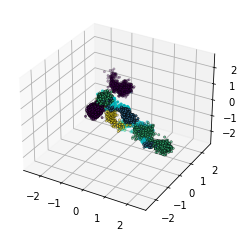

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

mask = np.array([x == y != z for x,y,z in zip(rbf_SVM_test,y_test,regL2_test)])

ax.scatter(X_test[mask,0], X_test[mask,1], X_test[mask,2], c=y_test[mask], linewidth=1, edgecolor="c", marker=".")
ax.scatter(X_test[~mask,0], X_test[~mask,1], X_test[~mask,2], c=y_test[~mask], linewidth=.5, edgecolor="k", marker=".")
ax.set_xlim([-x_max, x_max])
ax.set_ylim([-x_max, x_max])
ax.set_zlim([-x_max, x_max])

**TO DO (C.2):** Plot the confusion matrix for the SVM classifier and for logistic regression. The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label. Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors. You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation). You can also print also the normalized confusion matrix.


In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, rbf_SVM_test)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = sklearn.metrics.confusion_matrix(y_test, regL2_test)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [2101  866 1823  309]

 Confusion matrix SVM  
 
 [[2101    0    0    0]
 [   0  838   28    0]
 [   0   14 1809    0]
 [   0    5    0  304]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.   0.  ]
 [0.   0.97 0.03 0.  ]
 [0.   0.01 0.99 0.  ]
 [0.   0.02 0.   0.98]]

 Confusion matrix LR  
 
 [[2098    0    3    0]
 [   0  326  508   32]
 [   3    0 1817    3]
 [   1    0   44  264]]

 Confusion matrix LR (normalized)   
 
 [[1.   0.   0.   0.  ]
 [0.   0.38 0.59 0.04]
 [0.   0.   1.   0.  ]
 [0.   0.   0.14 0.85]]


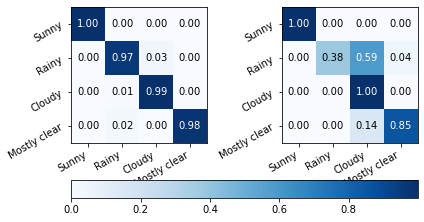

In [23]:
fig, axs = plt.subplots(1, 2)

for idx, conf in enumerate([confusion_SVM, confusion_LR]):
    
    im = axs[idx].imshow(conf /counts[:,None], cmap="Blues",interpolation='nearest')
    axs[idx].set_xticks([0,1,2,3])
    axs[idx].set_yticks([0,1,2,3])
    axs[idx].set_xticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    axs[idx].set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    cm = conf /counts[:,None]
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axs[idx].text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
fig.colorbar(im, ax=axs[:], location='bottom')  
plt.show()

**TO DO (C.Q2) [Answer the following]** <br> 
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


<div class="alert alert-block alert-info">
    **ANSWER C.Q2**:<br>
The confusion matrix of SVM model shows a nearly perfect match between the predicted and the true labels of the test set, the lower accuracy presented is 0.97 for the label "Rainy". The matrix of logistic regression with regularization, instead, presents contrasting results: the labels "Sunny" and "Cloudy" are all predicted correctly, with a perfect score of 1, while the label "Mostly Clear" has an intermediate score of 0.85 and "Rainy" label is matched correctly only 38% of times. It is interesting to observe that for both the classifiers the most difficult label to predict was "Rainy" and that for both of them the misclassified samples were mostly labeled as "Cloudy" (for the SVM this is clearly only a subtlety since the result are almost perfect for all the labels). 
    One explanation of this behaviour could be linked to the frequencies of the training set: indeed the most frequent label is "Sunny" (f = 4017) which both of the classifiers are able to perfectly predict, the second one is "Cloudy" (f = 3700) which both the model predict correctly (in the sense that almost all the true-labeled "Cloudy" samples are correctly predicted), the third one is "Rainy", with a frequency of 1662 which is less than half of the previous one, then since it is reasonable to think that the "Rainy" samples and the "Cloudy" ones have similar values (the weather in these condition has common features), the algorithm is easily proned to misclassified a true, more rare, "Rainy" sample into a "Cloudy" one. The least frequent label in the training set is "Mostly Clear", with only 621 presences, but it is surprisingly well predicted by both the models. This could be justified by values in the samples that do not overlap with the ones of the other samples, making it more recognizable and allow the trained models to correctly predict this label even if they were trained on a small number of samples. 
    </div>